## Machine Learning Models: -

### Understanding and Building ML model: -
-> In ML once we have collected the data(1. Data collection), then we prepare the data(2. Data Preparation) to pull out some meaningful insights from the dataset.
-> Once our Data is prepared we chose our model to perform tasks related output demand form the dataset(3. Choose a Model).
-> Here we are considering Linear Regression algorithm best for our dataset.

### To build a model first we import necessary modules required for assisting our lines of code execution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

%matplotlib inline

### Now we load our dataset to be analysed:

In [4]:
insurance = pd.read_csv(r"C:\Users\singhegm\Downloads\archive5\insurance.csv")

### What is Exploratory Data Analysis?

-> Before building our model we explore our data thoroughly, so that our insights are not tampered due to error in data-values:

-> Exploratory Data Analysis (EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

a. Extracting important variables and leaving behind useless variables, 

b. Identifying outliers, missing values, or human error, 

c. Understanding the relationship(s), or lack of, between variables, 

d. Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the proces. 

-> Exploratory Data Analysis does two main things:
1. It helps clean up a dataset.
2. It gives you a better understanding of the variables and the relationships between them.


Hence: With EDA it’s more like “garbage in", "perform EDA", if garbage is found then possibly "garbage out".

-> Components of EDA: -

1. Understanding your variables
2. Cleaning your dataset
3. Analyzing relationships between variables

### 1. Understanding your variiables:

In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
# .nunique(axis=0) returns the number of unique values for each variable.

insurance.nunique(axis=0)
insurance.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
insurance.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

### 2. Cleaning the dataset:

-> Some of the cleaning techniques involves(depends on the dataset and operations to do): -

a. Removing Redundant variables

b. Variable Selection

c. Removing Outliers

d. Removing Rows with Null Values

### Here depending on the dataset we have, we need to create some dummy columns and drop some columns to make easy calculation or our model to run successfully:

In [15]:
insurance['Male']=pd.get_dummies(insurance['sex'],drop_first=True)
insurance.drop(['sex'], axis = True)

,age,bmi,children,smoker,region,charges,Male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


In [16]:
regions = pd.get_dummies(insurance['region'],drop_first=True)
regions

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [17]:
changed_insurance1 = [insurance, regions]
insur = pd.concat(changed_insurance1,axis=1)
insur

,age,sex,bmi,children,smoker,region,charges,Male,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,1


In [18]:
# now we will drop the "sex" and "region" columns form table since its Dummies values are created:

insur.drop(['sex','region'],axis=1,inplace=True)
insur

,age,bmi,children,smoker,charges,Male,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,0,0,0,1
1,18,33.770,1,no,1725.55230,1,0,1,0
2,28,33.000,3,no,4449.46200,1,0,1,0
3,33,22.705,0,no,21984.47061,1,1,0,0
4,32,28.880,0,no,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,1,0,0
1334,18,31.920,0,no,2205.98080,0,0,0,0
1335,18,36.850,0,no,1629.83350,0,0,1,0
1336,21,25.800,0,no,2007.94500,0,0,0,1


In [19]:
insur['Smoke']=pd.get_dummies(insur['smoker'],drop_first=True)
insur.drop(['smoker'],axis=1,inplace=True)
insur

,age,bmi,children,charges,Male,northwest,southeast,southwest,Smoke
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


In [20]:
insur_cleaned = insur.dropna(axis=0)
insur_cleaned.shape

(1338, 9)

In [21]:
# All the dummy variables created, finally table is checked for final na values or any null values:

insur_cleaned

,age,bmi,children,charges,Male,northwest,southeast,southwest,Smoke
0,19,27.900,0,16884.92400,0,0,0,1,1
1,18,33.770,1,1725.55230,1,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0
3,33,22.705,0,21984.47061,1,1,0,0,0
4,32,28.880,0,3866.85520,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,0


## 3. Analyzing relationships between variables:

### a. Correlation Matrix:
-> It’s the fastest way to develop a general understanding of all the variables. 

-> To review, correlation is a measurement that describes the relationship between two variables.

-> A correlation matrix is a table that shows the correlation coefficients between many variables. 

-> We use sns.heatmap() to plot a correlation matrix of all of the variables in the dataset.

In [22]:
insur_cleaned.corr()

,age,bmi,children,charges,Male,northwest,southeast,southwest,Smoke
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.000407,-0.011642,0.010016,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,-0.135996,0.270025,-0.006205,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.024806,-0.023066,0.021914,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,-0.039905,0.073982,-0.043210,0.787251
Male,-0.020856,0.046371,0.017163,0.057292,1.000000,-0.011156,0.017117,-0.004184,0.076185
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,1.000000,-0.346265,-0.320829,-0.036945
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,-0.346265,1.000000,-0.346265,0.068498
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.320829,-0.346265,1.000000,-0.036945
Smoke,-0.025019,0.003750,0.007673,0.787251,0.076185,-0.036945,0.068498,-0.036945,1.000000


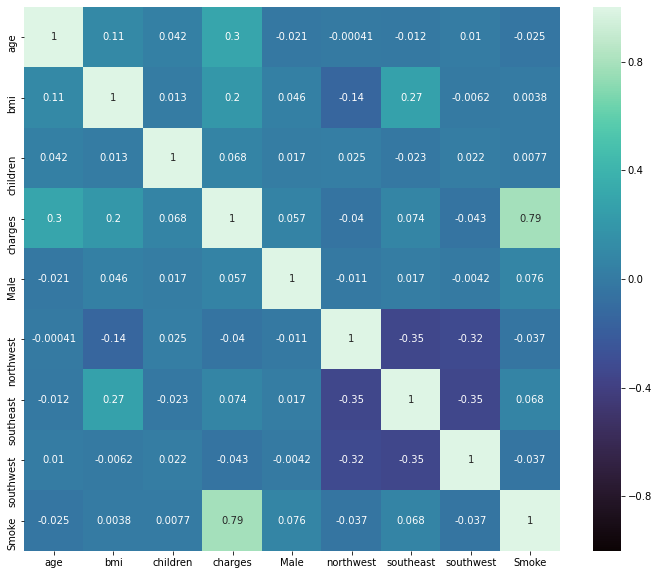

In [23]:
corr = insur_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

### b. Scatterplot:

-> It’s pretty hard to beat correlation heatmaps when it comes to data visualizations, but scatterplots are arguably one of the most useful visualizations when it comes to data.

-> A scatterplot is a type of graph which ‘plots’ the values of two variables along two axes, like age and height. 

-> Scatterplots are useful for many reasons: just like correlation matrices, it allows you to quickly understand a relationship between two variables, it’s useful for identifying outliers, and it’s instrumental when polynomial multiple regression models. 

-> We use .plot() and set the ‘kind’ of graph as scatter to display scatterplot. 

-> We also set the x-axis to ‘bmi’ and y-axis as ‘charges’, since we want to see how different levels of mileage affects price.

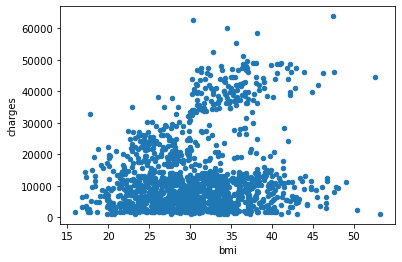

In [24]:
insur_cleaned.plot(kind='scatter', x='bmi', y='charges')

### c. As a bonus, sns.pairplot() is a great way to create scatterplots between all of your variables.

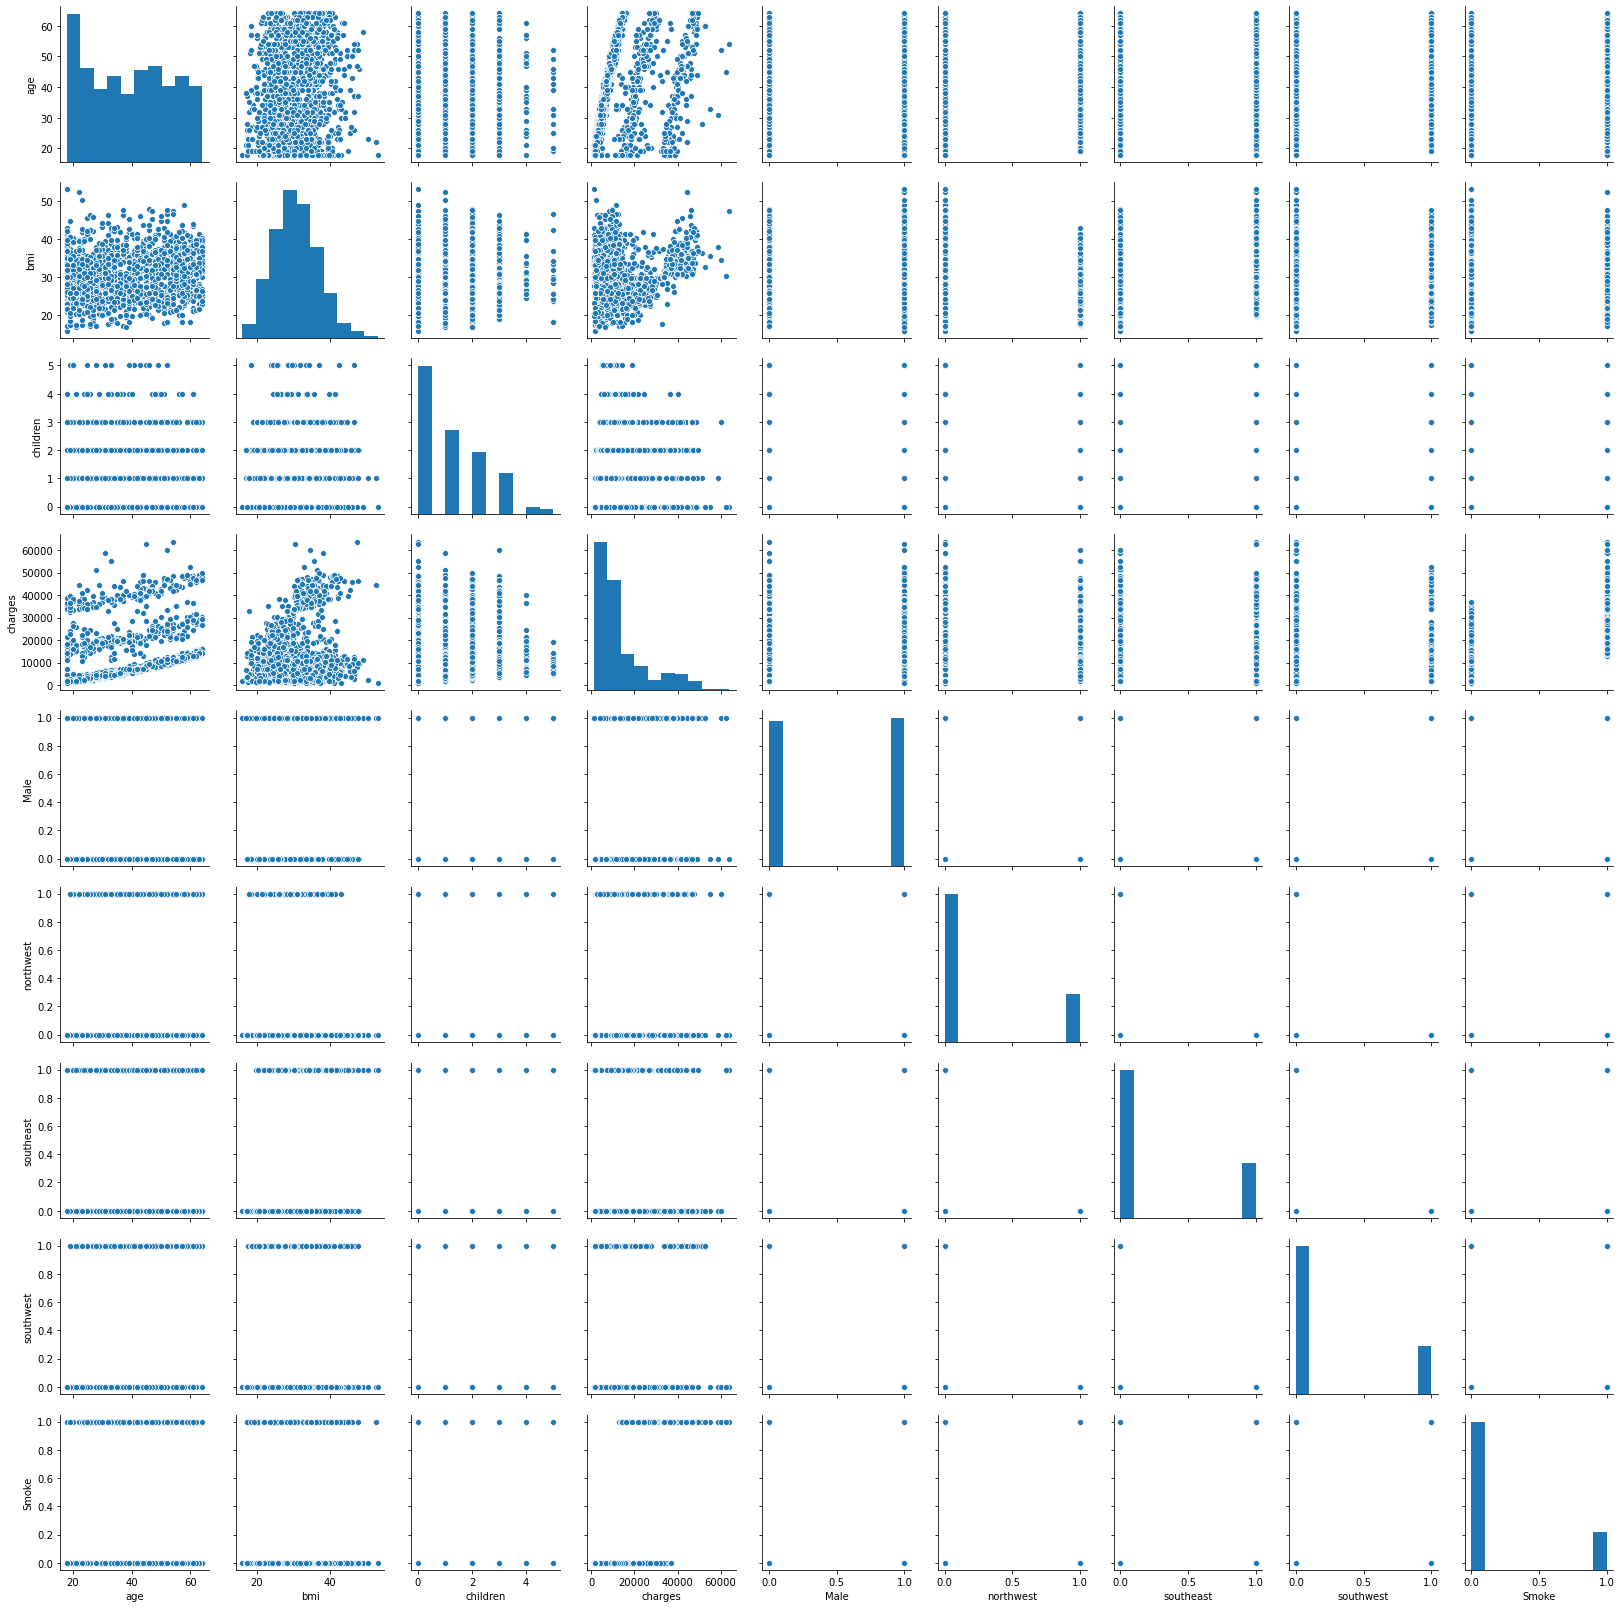

In [25]:
sns.pairplot(insur_cleaned)

### Some other methds used to identify relations b/w variables are:-

d. Histogram:
Correlation matrices and scatterplots are useful for exploring the relationship between two variables. But what if you only wanted to explore a single variable by itself? This is when histograms come into play. Histograms look like bar graphs but they show the distribution of a variable’s set of values.

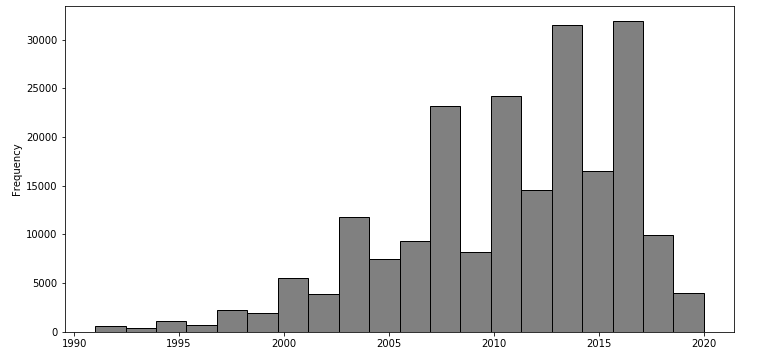

e. Boxplot:
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

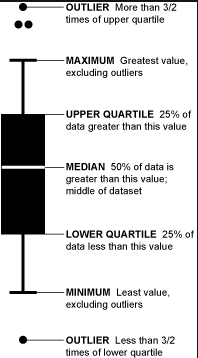


f. stacked bar graphs:
A stacked bar graph (or stacked bar chart) is a chart that uses bars to show comparisons between categories of data, but with ability to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole.

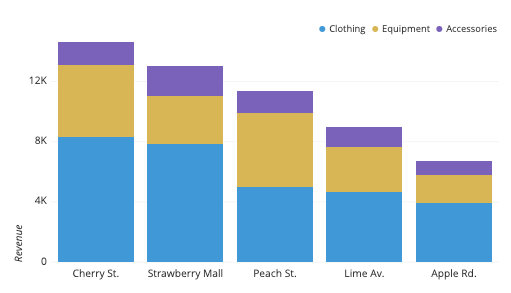



g. area plots:
An Area Plot is an extension of a Line Chart. An Area Plot is obtained by filling the region between the Line Chart and the axes with a color. When more than one Area Plot is shown in the same graph, each area plot is filled with a different color.

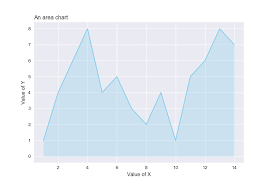


h. violin plots:
A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

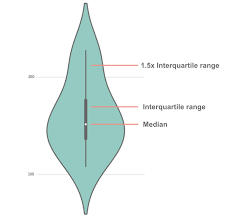


i. geospatial visuals:
"Folium" is a powerful data visualisation library in Python that was built primarily to help people visualize geospatial data. With Folium, one can create a map of any location in the world as long as its latitude and longitude values are known.

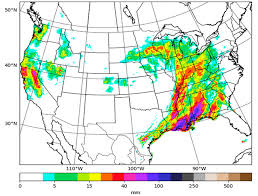

### Once the EDA is completed, Now we will chose a model to perform all the operations on our dataset to pull out useful insights:

### Here we will chose Linear Regression Model to evaluate our data-

#### Step 1 - we have already imported necessary modules: 

#### Step 2 - Provide data: we will chose our target variable(dependent) and the independent variable:

In [26]:
X=insur_cleaned.drop(['charges'],axis=True)
X

,age,bmi,children,Male,northwest,southeast,southwest,Smoke
0,19,27.900,0,0,0,0,1,1
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,1,0,0,0
4,32,28.880,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,1,0,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,1,0,0
1336,21,25.800,0,0,0,0,1,0


In [27]:
y= insur_cleaned['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
# "The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 
# and standard deviation of 1. In case of multivariate data, this is done feature-wise 
# (in other words independently for each column of the data).

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [29]:
# we are considering 70% data for training and remaining for test:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#### Step 3: Create a model and fit it:

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

#### Step 4: Get results:

### -> There are 3 main metrics for model evaluation in regression: -
1. R Square/Adjusted R Square.
2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
3. Mean Absolute Error(MAE)

In [32]:
# Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.
# You can obtain the coefficient of determination (𝑅²) using .score() on a model:

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7503866982055245


In [33]:
model.score(X_train, y_train)

0.7480401948486024

In [34]:
model.score(X_test, y_test)

0.7552944022900888

In [35]:
coef = model.coef_
coef

array([3752.26368778, 1973.6157991 ,  617.46183451,  -84.38469293,
         71.409867  , -259.42873272, -224.43682244, 9616.53517522])

In [36]:
intercept = model.intercept_
intercept

13171.017879945319

In [37]:
print("y = ", intercept, "+", end="")

for i in range(0, len(coef)):
    print(coef[i], "x", i, "+", end="")

print("E")

y =  13171.017879945319 +3752.2636877822993 x 0 +1973.6157991045689 x 1 +617.4618345057627 x 2 +-84.38469292728537 x 3 +71.40986700343198 x 4 +-259.42873272311385 x 5 +-224.43682243682986 x 6 +9616.53517521976 x 7 +E


In [38]:
y_pred = model.predict(X_test)           

print('predicted response:', y_pred, sep='\n')

predicted response:
[ 1.98045198e+03  8.22808489e+03  3.89288238e+04  1.56591006e+04
  7.84483065e+03  1.05320105e+04  5.09084529e+03  1.09637408e+04
  3.40628263e+04  2.32088284e+03  1.06262425e+04  7.22742608e+03
  1.13591313e+04  7.10624115e+03  5.97118907e+03  7.62774485e+03
  2.64730499e+03  1.05964523e+04  3.92031448e+04  1.02721557e+04
  1.47602991e+04  6.14690820e+03  1.25522061e+04  3.31298735e+04
  3.50103104e+04  1.21469966e+04  4.79471205e+03  5.27131735e+03
  2.64152176e+04  6.26468963e+03  2.77386871e+03  1.53842691e+04
  2.98001626e+04  3.73512719e+04  3.86463485e+04  5.76758628e+03
  6.05548536e+03  1.12490014e+04  1.26901437e+04  9.05550418e+03
  4.66778416e+03 -1.23625846e+01  6.89243304e+03  9.06080494e+03
  3.16399352e+04  1.05244626e+04  3.59798679e+03  3.14668117e+04
  8.11698493e+02  5.32530487e+03  2.74788201e+04  3.37714825e+04
  2.61313966e+03  6.22284388e+03  8.85604450e+03  7.36577823e+02
  3.17949137e+03  3.72859433e+04  2.21715339e+03  1.42617802e+04
  3.2

### Predicting y value to an unknown value of X using our model:

In [39]:
# Now lets input a new value of X or a future row whose y(charges) are unknown, then the prediction is:
# here since our X contains 8-values or columns, we are adding a row whose charges are not yet known, 
# we use .reshape(1,-1) here rather than .reshape(-1,1) to create a new row value:

X_new = np.array([-1.2, 2.0, -3.1, 4.02, 5.1, -0.26, 0.7, 1.3]).reshape(1, -1)
X_new

array([[-1.2 ,  2.  , -3.1 ,  4.02,  5.1 , -0.26,  0.7 ,  1.3 ]])

In [40]:
y_newpred = model.predict(X_new)
print(y_newpred)

[23138.20664459]
